In [1]:
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import re
import netCDF4 as nc
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime


In [2]:
def date2decimal(date_str):
    dt = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    year = dt.year
    is_leap_year = (dt.year % 4 == 0 and dt.year % 100 != 0) or (dt.year % 400 == 0)
    days_in_year = 366 if is_leap_year else 365
    day_of_year = dt.timetuple().tm_yday
    fractional_year = day_of_year/days_in_year+(dt.hour*3600+dt.minute*60+dt.second)/(days_in_year*86400)
    decimal_representation = year + fractional_year
    return decimal_representation    


In [3]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dahiti = 'data/altimetry-water-level/dahiti/dahiti_hma.gpkg'
path_hydroweb = 'data/altimetry-water-level/hydroweb/hydroweb_lakes/hydroweb_hma.gpkg'
# path_g_realm = 'data/altimetry-water-level/G-REALM/summary_list.gpkg'


In [4]:
dahiti_station = gpd.read_file(path_dahiti)
hydroweb_station = gpd.read_file(path_hydroweb)
# g_realm_station = gpd.read_file(path_g_realm)
hma_gtng = gpd.read_file(path_hma_gtng)


Text(0.5, 1.0, 'Distribution of altimetry-based water level station')

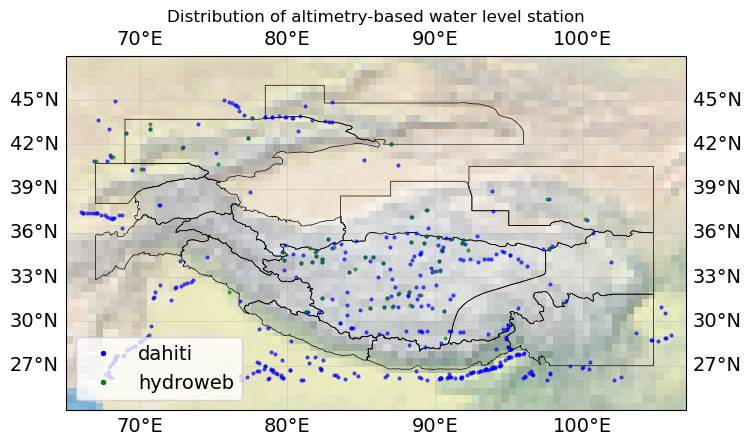

In [5]:
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
dahiti_station.plot(ax=ax, edgecolor='blue', facecolor='blue', markersize=4, alpha=0.6, zorder=2)
hydroweb_station.plot(ax=ax, edgecolor='green', facecolor='green', markersize=4, alpha=0.6, zorder=2)
# g_realm_station.plot(ax=ax, edgecolor='red', facecolor='red', markersize=5, alpha=0.4, zorder=2)
ax.stock_img()
legend_patches = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='dahiti'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='hydroweb'),
    # Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='g_realm')
    ]
ax.legend(handles=legend_patches, loc='lower left')
ax.set_title('Distribution of altimetry-based water level station', fontsize=12)
# plt.savefig('figures/hma_altimetry_stations.png', bbox_inches='tight', dpi=100)



#### show the time-series water level
dahiti:

In [27]:
dir_dahiti = 'data/altimetry-water-level/dahiti'
paths_dahiti = glob(dir_dahiti + '/*.nc')
print(len(paths_dahiti))
paths_dahiti[0]


323


'data/altimetry-water-level/dahiti/10855.nc'

Text(0.5, 1.01, 'dahiti station: Meriche, Lake')

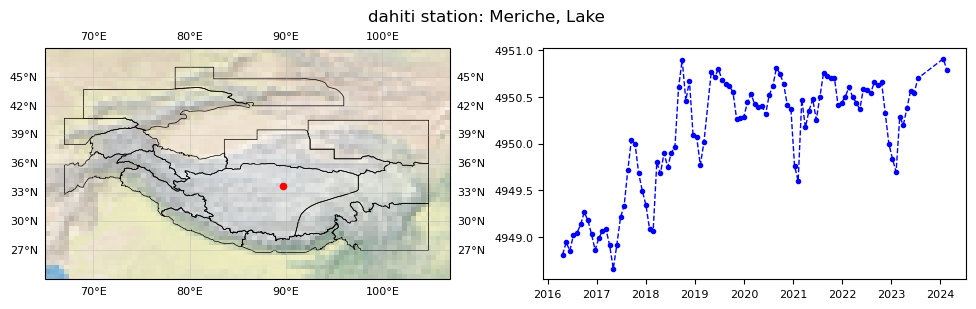

In [28]:
id = 230
dset = nc.Dataset(paths_dahiti[id], mode='r')
date = dset['datetime'][:]
wat_level = dset['water_level'][:]
date_decimal = [date2decimal(dt) for dt in date]
plt.rcParams.update({'font.size':8})
fig = plt.figure(figsize=(12,3))
### location of the station
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
ax1.set_extent([65.0, 107.0, 24.0, 46.0])
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=0.5)
ax1.scatter(dset.longitude, dset.latitude, color='red', s=20, alpha=1, zorder=2)
ax1.stock_img()
### time-series water level
ax2 = fig.add_subplot(1,2,2)
ax2.plot(date_decimal, wat_level, marker='o', linestyle='--', color='blue', linewidth=1, markersize=3)
fig.suptitle(f'dahiti station: {dset.target_name}', fontsize=12, y=1.01)


hydroweb:

In [19]:
dir_hydroweb = 'data/altimetry-water-level/hydroweb/hydroweb_lakes'
paths_hydroweb = glob(dir_hydroweb + '/*.txt')
print(len(paths_hydroweb))
paths_hydroweb[0]


57


'data/altimetry-water-level/hydroweb/hydroweb_lakes/hydroprd_L_lixiodain-co.txt'

In [20]:
id = 32
lake_name = paths_hydroweb[id].split('/')[-1].split('.')[0].split('_')[-1]
with open(paths_hydroweb[id], 'r') as f:
    content = f.read()
    # Extract decimal year and height using regular expressions
    pattern = re.compile(r'(\d+\.\d+)\s*;\s*\d{4}/\d{2}/\d{2}\s*;\s*\d{2}:\d{2}\s*;\s*([\d\.]+)')
    matches = pattern.findall(content)
    # Convert matches to lists of floats
    decimal_years = [float(match[0]) for match in matches]
    heights = [float(match[1]) for match in matches]
    # Extract longitude and latitude from the content
    lon_match = re.search(r'lon=([\d\.]+)', content)
    lat_match = re.search(r'lat=([\d\.]+)', content)
    loc = (float(lon_match.group(1)), float(lat_match.group(1)))


Text(0.5, 1.01, 'hydroweb station: namco')

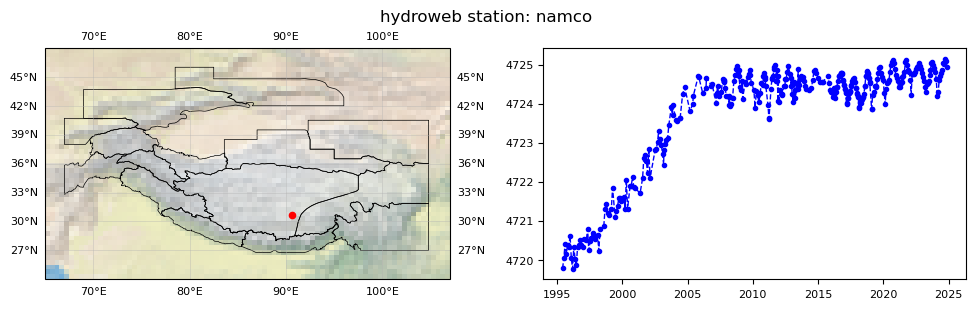

In [21]:
plt.rcParams.update({'font.size':8})
fig = plt.figure(figsize=(12,3))
### location of the station
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
ax1.set_extent([65.0, 107.0, 24.0, 46.0])
ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=0.5)
ax1.scatter(loc[0], loc[1], color='red', s=20, alpha=1, zorder=2)
ax1.stock_img()
### time-series water level
ax2 = fig.add_subplot(1,2,2)
ax2.plot(decimal_years, heights, marker='o', linestyle='--', color='blue', linewidth=1, markersize=3)
fig.suptitle(f'hydroweb station: {lake_name}', fontsize=12, y=1.01)
